## Calculate elemental descriptors and draw heatmap

This sample show how to load date from XenonPy's preset dataset then calculate elemental descriptors by use `ElementDesc`.

### load compound's properties fetched from Materials Project database

In [1]:
from xenonpy.utils.datatools import Loader

loader = Loader()
props = loader('mp_inorganic')
props.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69640 entries, TlAgTe2 to YTi
Data columns (total 13 columns):
anonymous_formula            69640 non-null object
band_gap                     69640 non-null float64
composition                  69640 non-null object
density                      69640 non-null float64
e_above_hull                 69640 non-null float64
efermi                       69640 non-null float64
elements                     69640 non-null object
final_energy_per_atom        69640 non-null float64
formation_energy_per_atom    69640 non-null float64
has_bandstructure            69640 non-null bool
oxide_type                   69640 non-null object
total_magnetization          69640 non-null float64
volume                       69640 non-null float64
dtypes: bool(1), float64(8), object(4)
memory usage: 7.0+ MB


In [2]:
# select stable structure
props = props[props.e_above_hull == 0]
props.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23776 entries, EuAcAu2 to SmTlSe2
Data columns (total 13 columns):
anonymous_formula            23776 non-null object
band_gap                     23776 non-null float64
composition                  23776 non-null object
density                      23776 non-null float64
e_above_hull                 23776 non-null float64
efermi                       23776 non-null float64
elements                     23776 non-null object
final_energy_per_atom        23776 non-null float64
formation_energy_per_atom    23776 non-null float64
has_bandstructure            23776 non-null bool
oxide_type                   23776 non-null object
total_magnetization          23776 non-null float64
volume                       23776 non-null float64
dtypes: bool(1), float64(8), object(4)
memory usage: 2.4+ MB


### calculate descriptors from composition

In [3]:
from xenonpy.descriptor import ElementDesc

desc = ElementDesc().fit_transform(props)
desc.info()

converting 23776 compounds
<class 'pandas.core.frame.DataFrame'>
Index: 23776 entries, EuAcAu2 to SmTlSe2
Columns: 290 entries, ave:atomic_number to min:Polarizability
dtypes: float64(290)
memory usage: 52.8+ MB


### save descriptors

In [4]:
from xenonpy.utils.datatools import Saver

saver = Saver('element_desc')  # name it as 'element_desc'
saver(desc)  # save

### draw elemental descriptors heatmap

As comparison, we resort descriptors with property `density`

In [5]:
from xenonpy.visualization import DescHeatmap

# reload saved descriptors
desc = loader('element_desc').last()


dens = props[props['density'] != 0]
dens = dens.reset_index(drop=True)
dens = dens.sort_values(by='density', ascending=False)
desc_dens = desc.iloc[dens.index, :]
dens = dens['density']

saver_dens = Saver('density')
saver_dens(dens)

saver_desc = Saver('dens_desc')
saver_desc(desc_dens)

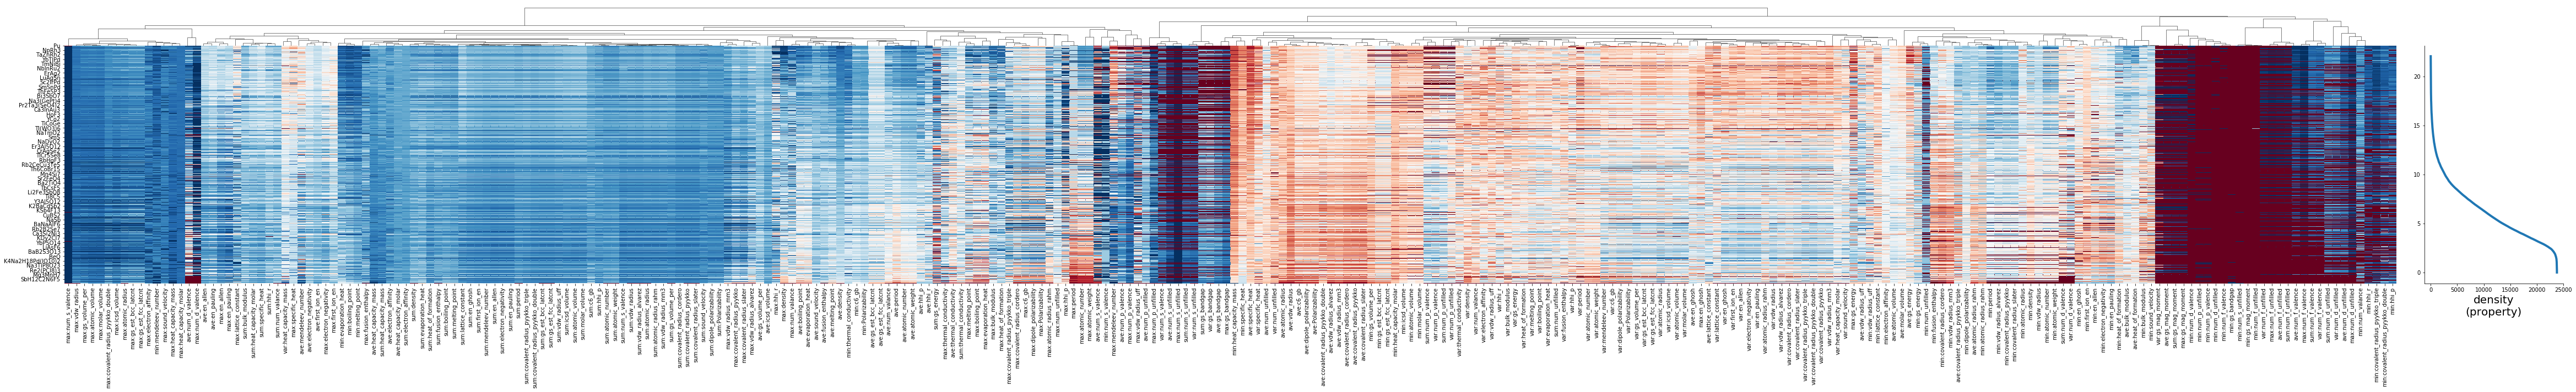

In [8]:
%matplotlib inline

# draw heatmap
dh_map = DescHeatmap(
#     save=dict(fname='density_desc.png', dpi=150, bbox_inches='tight', transparent=False),
    method='complete',
    bc=True,  # box-cox transfer
    figsize=(70, 10))

dh_map.fit(desc_dens)
dh_map.draw(dens)